**도서관 빅데이터를 활용한
20대 성별에 따른 대출 트랜드 분석**

* 도서관 정보나루 데이터 사용

In [158]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [3]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns

# 파일 경로
file_path_man = '/content/2022년_20대_남성_인기도서.csv'
file_path_woman = '/content/2022년_20대_여성_인기도서.csv'


# 데이터프레임 변환(인코딩 에러 -> encoding 파라미터 활용)
df_man = pd.read_csv(file_path_man, encoding='cp949')
df_woman = pd.read_csv(file_path_woman, encoding='cp949')

#성별 열 추가
df_man['성별'] = '남성'
print('2022년_20대_남성_인기도서')
print(df_man.head())

df_woman['성별'] = '여성'
print('2022년_20대_여성_인기도서')
print(df_woman.head())


# 데이터프레임 합치기(행 방향으로 합치기)
df = pd.concat([df_man, df_woman])
print(df.info()) #400row 확인


#합친 데이터 프레임 가공
#권,ISBN 부가기호 열 삭제
df.drop(['권', 'ISBN부가기호'], axis=1, inplace=True)

#KDC 결측치 처리(396 non-null, 4건의 NaN)
df['KDC'].fillna(method='bfill', inplace=True)
print(df.info())



2022년_20대_남성_인기도서
   순위                                       서명                       저자  \
0   1  사피엔스 :유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문     지은이: 유발 하라리 ;옮긴이: 조현욱   
1   2       공정하다는 착각 :능력주의는 모두에게 같은 기회를 제공하는가         마이클 샌델 지음 ;함규진 옮김   
2   3              나미야 잡화점의 기적 :히가시노 게이고 장편소설   지은이: 히가시노 게이고 ;옮긴이: 양윤옥   
3   4                     달러구트 꿈 백화점.이미예 장편소설                  지은이: 이미예   
4   5           돈의 속성 :최상위 부자가 말하는 돈에 대한 모든 것                  지은이: 김승호   

                출판사  출판년도   권          ISBN  ISBN부가기호     KDC  대출건수  성별  
0               김영사  2015 NaN  9.788930e+12    3900.0  909.00   973  남성  
1               미래엔  2020 NaN  9.791160e+12    3300.0  332.60   879  남성  
2              현대문학  2012 NaN  9.788970e+12    3830.0  833.60   842  남성  
3             팩토리나인  2020 NaN  9.791170e+12    3810.0  813.70   783  남성  
4  Snowfox(스노우폭스북스)  2020 NaN  9.791190e+12    3320.0  327.04   730  남성  
2022년_20대_여성_인기도서
   순위                           서명        저자                  출판사  출판

성별
남성     70985
여성    295929
Name: 대출건수, dtype: int64
성별
남성     70985
여성    295929
Name: 대출건수, dtype: int64


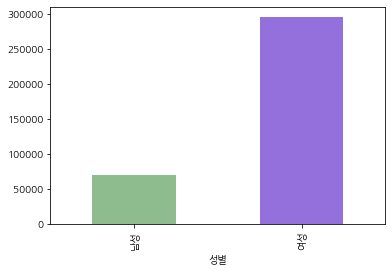

In [53]:
#성별별 대출건수 합산을 위한 groupby 연산
grouped_sex = df.groupby(df['성별'])['대출건수'].sum()

# 시리즈 -> 데이터프레임 변환
df_sex = pd.Series(grouped_sex, index=['남성', '여성']).rename_axis('성별')
print(grouped_sex)
print(df_sex)

#성별별 대출건수 시각화
colors=['darkseagreen', 'mediumpurple']
df_sex.plot(kind='bar', color=colors)


In [54]:
# KDC(한국십진분류법) 기반 분류를 위해 함수 매핑

def kdcFunc(x) :
  if (x > 0 and x <100):
    return '총류'
  elif (x >=100 and x<200) :
    return '철학'
  elif (x >=200 and x<300) :
    return '종교'
  elif (x >=300 and x<400) :
    return '사회과학'
  elif (x >=400 and x<500) :
    return '자연과학'
  elif (x >=500 and x<600) :
    return '기술과학'
  elif (x >=600 and x<700) :
    return '예술'
  elif (x >=700 and x<800) :
    return '언어'
  elif (x >=800 and x<900) :
    return '문학'
  elif (x >=900 and x<1000) :
    return '역사'
  else :
    return '미상'

df['sorted_KDC'] = df.apply(lambda x:kdcFunc(x['KDC']), axis=1)

print(df.info())
print(df['sorted_KDC'].value_counts())
print(df)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   순위          400 non-null    int64  
 1   서명          400 non-null    object 
 2   저자          400 non-null    object 
 3   출판사         400 non-null    object 
 4   출판년도        400 non-null    object 
 5   ISBN        400 non-null    float64
 6   KDC         400 non-null    float64
 7   대출건수        400 non-null    int64  
 8   성별          400 non-null    object 
 9   sorted_KDC  400 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 50.5+ KB
None
문학      220
사회과학    103
철학       37
총류       13
자연과학      9
기술과학      9
역사        6
예술        3
Name: sorted_KDC, dtype: int64
      순위                                       서명                       저자  \
0      1  사피엔스 :유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문     지은이: 유발 하라리 ;옮긴이: 조현욱   
1      2       공정하다는 착각 :능력주의는 모두에게 같은 기회를 제공하는가    

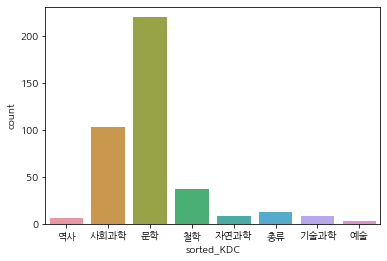

In [72]:
#20대 전체 기준 KDC 그래프

sns.set_palette("hls")
sns.countplot(data=df, x='sorted_KDC')

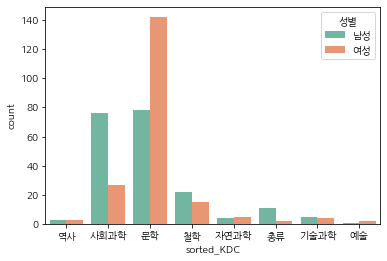

In [74]:
# 성별별 KDC 분류
sns.set_palette("Set2")
sns.countplot(data=df, x='sorted_KDC', hue='성별')

2021년 20대 성별, 분기별 대출량과 대출분야 분석

In [148]:
# 데이터 전처리

# 라이브러리 불러오기
import pandas as pd
import seaborn as sns


# csv 불러오기
file_path_man1 = '/content/2021_1분기_남성.csv'
file_path_man2 = '/content/2021_2분기_남성.csv'
file_path_man3 = '/content/2021_3분기_남성.csv'
file_path_man4 = '/content/2021_4분기_남성.csv'

file_path_woman1 = '/content/2021_1분기_여성.csv'
file_path_woman2 = '/content/2021_2분기_여성.csv'
file_path_woman3 = '/content/2021_3분기_여성.csv'
file_path_woman4 = '/content/2021_4분기_여성.csv'


# 데이터프레임 변환
df_man1 = pd.read_csv(file_path_man1, encoding='cp949')
df_man2 = pd.read_csv(file_path_man2, encoding='cp949')
df_man3 = pd.read_csv(file_path_man3, encoding='cp949')
df_man4 = pd.read_csv(file_path_man4, encoding='cp949')

df_woman1 = pd.read_csv(file_path_woman1, encoding='cp949')
df_woman2 = pd.read_csv(file_path_woman2, encoding='cp949')
df_woman3 = pd.read_csv(file_path_woman3, encoding='cp949')
df_woman4 = pd.read_csv(file_path_woman4, encoding='cp949')


# 성별, 분기 열 추가
man_list = [df_man1, df_man2, df_man3, df_man4]
woman_list = [df_woman1, df_woman2, df_woman3, df_woman4]
num_list = [1, 2, 3, 4]

for i, j in zip(man_list, num_list):
  i['성별'] = '남성'
  i['분기'] = str(j)+ '분기'

for i, j in zip(woman_list, num_list) :
  i['성별'] = '여성'
  i['분기'] = str(j)+ '분기'
  
# print(df_man3.info())
# print(df_woman3.head())


# 데이터프레임 합치기(행 방향)
df_quater = pd.concat([df_man1, df_man2, df_man3, df_man4, df_woman1, df_woman2, df_woman3, df_woman4])
print(df_quater.info()) #1600행 확인(200*8)


# 데이터프레임 불필요한 행 삭제
df_quater.drop(['권', 'ISBN', 'ISBN부가기호'], axis=1, inplace=True)


# KDC 결측치 처리 (1597 non-null, 3건)
df_quater['KDC'].fillna(method='bfill', inplace=True)


# KDC 처리
df_quater['sorted_KDC'] = df_quater.apply(lambda x:kdcFunc(x['KDC']), axis=1)

print(df_quater.info())
print(df_quater['sorted_KDC'].value_counts())
print(df_quater)

df_quater.to_csv('분기별.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   순위        1600 non-null   int64  
 1   서명        1600 non-null   object 
 2   저자        1600 non-null   object 
 3   출판사       1600 non-null   object 
 4   출판년도      1600 non-null   object 
 5   권         163 non-null    float64
 6   ISBN      1600 non-null   float64
 7   ISBN부가기호  1584 non-null   float64
 8   KDC       1597 non-null   float64
 9   대출건수      1600 non-null   int64  
 10  성별        1600 non-null   object 
 11  분기        1600 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 162.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   순위          1600 non-null   int64  
 1   서명          1600 non-null   object 
 2   저자  

성별  분기 
남성  1분기    20124
    2분기    19200
    3분기    21538
    4분기    20121
여성  1분기    77371
    2분기    65949
    3분기    78994
    4분기    70568
Name: 대출건수, dtype: int64


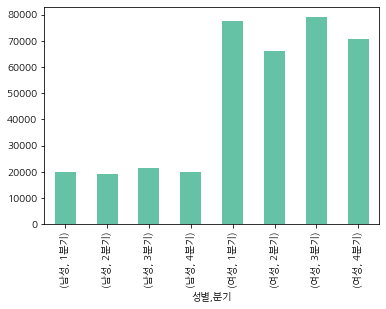

In [154]:
# 분기별 대출량
grouped_quater = df_quater.groupby(['성별', '분기'])['대출건수'].sum()
print(grouped_quater)
grouped_quater.plot.bar()


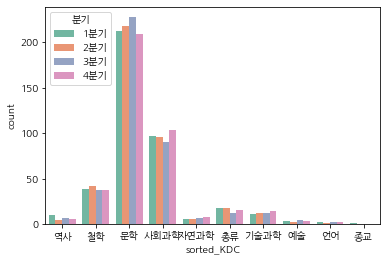

In [157]:
# 데이터 시각화

# 분기별 대출도서 유형 분류
sns.set_palette("Set2")
sns.countplot(data=df_quater, x='sorted_KDC', hue='분기')